# 訓練パイプライン

In [28]:
from sklearn.datasets import make_classification 
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import ExtraTreesClassifier 

X, y = make_classification(n_samples=150, 
        n_features=25, n_classes=3, n_informative=6, 
        n_redundant=0, random_state=7) 

k_best_selector = SelectKBest(f_regression, k=9) 

classifier = ExtraTreesClassifier(n_estimators=60, max_depth=4) 

processor_pipeline = Pipeline([('selector', k_best_selector), 
                               ('erf', classifier)]) 

processor_pipeline.set_params(selector__k=7, erf__n_estimators=30) 

processor_pipeline.fit(X, y) 

output = processor_pipeline.predict(X) 
print("Predicted output:\n", output) 

print("\nScore:", processor_pipeline.score(X, y)) 

# 特徴選択ブロックの状態を得る
status = processor_pipeline.named_steps['selector'].get_support() 

# 選択された特徴の番号を取得して表示する
selected = [i for i, x in enumerate(status) if x] 
print("\nIndices of selected features:", ', '.join([str(x) for x in selected])) 


Predicted output:
 [1 2 2 0 2 0 2 1 0 1 1 2 0 0 2 2 1 0 0 0 0 2 2 1 2 2 0 0 1 2 0 2 1 0 2 2 1
 1 2 2 2 0 1 2 2 1 1 2 1 0 1 2 2 2 2 0 2 2 0 2 2 0 1 0 2 0 0 1 1 2 0 0 0 2
 0 0 1 2 2 0 0 2 2 2 2 0 0 0 2 2 2 1 2 0 2 0 2 2 0 0 1 1 1 1 2 2 0 2 0 1 1
 0 2 1 0 0 1 1 1 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 1 0 2 0 1 2 0
 2 2]

Score: 0.8666666666666667

Indices of selected features: 4, 7, 8, 12, 14, 17, 22


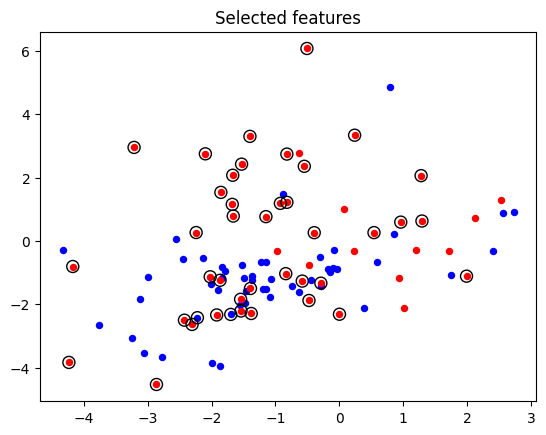

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure() 
plt.title('Selected features') 
plt.scatter(X[y==0,selected[0]], X[y==0,selected[1]], marker='.', s=75, color='blue') 
plt.scatter(X[y==1,selected[0]], X[y==1,selected[1]], marker='.', s=75, color='red') 
plt.scatter(X[output==1,selected[0]], X[output==1,selected[1]], marker='o', facecolors='none', s=75, color='black') 
plt.show()